<a href="https://colab.research.google.com/github/allenphos/ML-course/blob/main/Copy_of_HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import plotly.express as px
%matplotlib inline

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/medical-charges.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [5]:
#df.describe ()

In [6]:
#df.info()

In [7]:
df.isnull().values.sum()

0

In [8]:
#df.sort_values(by=['charges'], ascending=False).head(10)

In [9]:
#df.charges.hist()

1. Подивитись на дані та на статистику по даним.
2.  Проаналізувати чи є нульові значення та викиди. Виключити їх, якщо вони будуть перешкоджати отримати реальні дані. Змінити стрінг дані на флаги, як в колонках курець та стать.
3. За допомогою діаграм проаналізувати дані: чи впливає стать чи вік на те, скільки людина витрачає на річне страхування. Чи збільшуєть або наскільки збільшуються збори якщо у людини високий ІМТ чи якщо вона курить. Теж саме для кількості дітей та регіону.
4. Знайти залежності між данними та записати висновки

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [10]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [11]:
df.groupby('sex')['charges'].mean()

,charges
sex,
female,12569.58
male,13956.75


In [12]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Діаграма показує, що у чоловіків здебільшого сума збору та максимальна границя оплати збору більше, ніж у жінок.

In [13]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [14]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'yellow', 'blue', 'orange'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Діаграма показує, що з регіонів northeast та southeast платять збір трохи в більшому діапазоні, ніж інші регіони.

In [15]:
df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [16]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='children',
                   color_discrete_sequence=['grey', 'green', 'blue', 'blue', 'red'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Діаграма показує, що люди, у котрих 2-3 дитини платять більше за страховку. Та ті, у кого немає дітей в цілому платять менше річний збір.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [28]:
fig_region = px.histogram(
    df,
    x='region',
    color='smoker',
    barmode='group',  # Групування за статусом курця
    title='Розподіл регіонів відносно статусу курця',
    labels={'region': 'Регіон', 'count': 'Кількість'},
    template='plotly_white'
)

fig_region.show()


На діаграмі можна побачити, що більше всього курців та некурців у регіоні **southeast**.

In [42]:
# Violin plot for 'charges' vs. 'region' with 'smoker'
fig = px.violin(df,
                x='region',
                y='charges',
                color='smoker',
                box=True,
                points='all',
                title='Charges Distribution by Region and Smoker Status')
fig.show()


Але по зборам медіана найменше у некурців з регіону **southeast** і найбільше серед курців цього ж регіону, тож можна сказати, що більше всього платять збори курці з **southeast**.

In [36]:
fig_histogram = px.histogram(
    df,
    x='children',
    color='smoker',
    barmode='overlay',
    title='Гістограма: Кількість дітей залежно від статусу курця',
    labels={'children': 'Кількість дітей', 'smoker': 'Курить'},
    template='plotly_white',
    nbins=6  # Кількість бінів (стовпчиків)
)

fig_histogram.show()

На діаграмі можна побачити, що наявність дітей не дуже впливає на кількість курців.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [41]:
fig = px.violin(df,
                x='children',
                y='charges',
                #color='smoker',
                box=True,
                points='all',
                title='Charges Distribution by Number of Children and Smoker Status')
fig.show()

На діаграмі можна побачити, якщо у людини більше 1 дитини, то річні збори зростають.

In [43]:
fig = px.violin(df,
                x='children',
                y='charges',
                color='smoker',
                box=True,
                points='all',
                title='Charges Distribution by Number of Children and Smoker Status')
fig.show()

Тут можна побачити, що у людей, які мають 2 дитини та курять по мідіані платять найбільше зборів. А з некурців найбільше за мідіаною платять люди з 4 дітьми.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [45]:
non_smoker_df = df[df.smoker == 'no']

In [46]:
def estimate_charges(age, w, b):
    return w * age + b

In [47]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

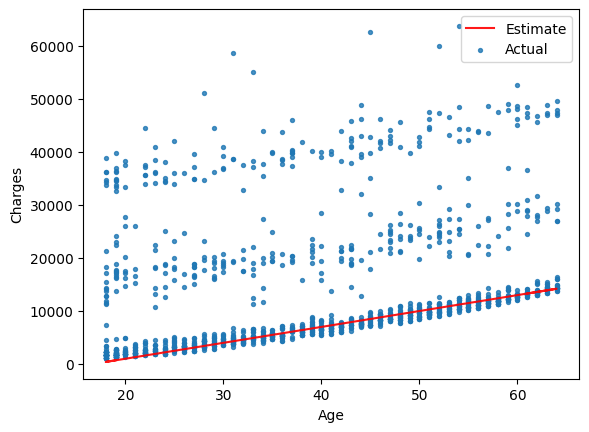

In [96]:
try_parameters(df, 300, -5000)

Чим більше кут нахилу, тим більше стає charges, та щоб це урівняти b значення має бути від'ємним.

Приблизне відношення між віком та зборами можна побачити на лінії 300 * age + (-5000).

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [99]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [97]:
df.charges.describe()

,charges
count,1338.00
mean,13270.42
std,12110.01
min,1121.87
25%,4740.29
50%,9382.03
75%,16639.91
max,63770.43


RMSE Loss:  4956.973980899423


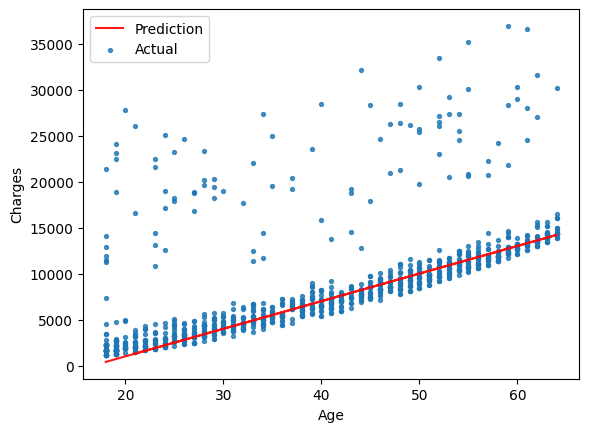

In [100]:
try_parameters(300, -5000)

RMSE Loss:  4686.97290587829


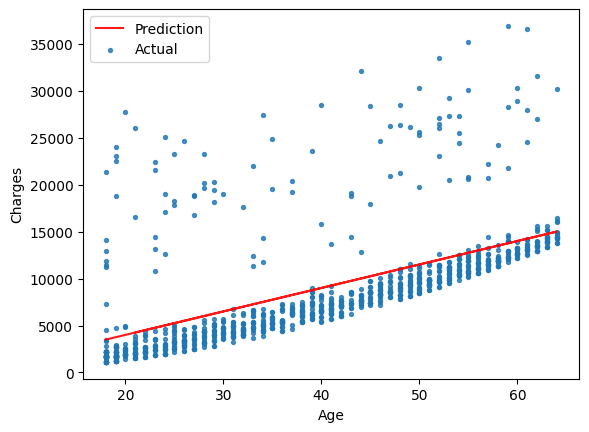

In [144]:
try_parameters(250, -1000)

Змогла трохи зменшити втрату завдяки методу тику. Стратегія зменшувати або збільшувати параметри поки не буде досягнута мінімальна можлива втрата.